In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import ticker as ticker
import requests

In [2]:
RAPIDAPI_KEY = "06e7a2971emsh9fe8d7e01017049p1fbbd0jsn61eeecf7d385"
RAPIDAPI_HOST = "api-nba-v1.p.rapidapi.com"

In [3]:
season_string = ""
inputdata = dict()
inputdata["Teams"] = list()
inputdata["Result"] = list()
inputdata["Win-Loss"] = list()

In [4]:
def fetchStandingData(year):
    if isinstance(year, str):
        year = year
    else:
        year = str(year)
    response = requests.get("https://api-nba-vl.p.rapidapi.com/standings/standard/"+year, 
                           headers={
                               "X-RapidAPI-Host": RAPIDAPI_HOST,
                               "X-RapidAPI-Key": RAPIDAPI_KEY
                           })
    if(response.status_code == 200):
        return response.json()
    else:
        
        return None

In [5]:
def fetchTeamNames(teamId):
    response = requests.get("https://api-nba-v1.p.rapidapi.com/teams/teamId/"+teamId,
                           headers={
                               "X-RapidAPI-Host": RAPIDAPI_HOST,
                               "X-RapidAPI-Key": RAPIDAPI_KEY
                           })
    if(response.status_code == 200):
        return response.json()
    else:
        return None

In [6]:
response = fetchStandingData(2018)

In [7]:
standings_data = response["api"]["standings"]

In [8]:
for team_data in standings_data:
    response = fetchTeamNames(team_data["teamId"])
    team_name = response["api"]["teams"][0]["fullName"]
    inputdata["Teams"].append(team_name)
    inputdata["Result"].append("Win")
    inputdata["Win-Loss"].append(int(team_data["win"]))
    
    inputdata["Teams"].append(team_name)
    inputdata["Result"].append("Loss")
    inputdata["Win-Loss"].append(int(team_data["loss"]))
    
    print("Team name: ", team_name)
    print("Wins: ", team_data["win"])
    print("Loss: ", team_data["loss"])
    print("\n")
    
df = pd.DataFrame(inputdata)

Team name:  Atlanta Hawks
Wins:  29
Loss:  53


Team name:  Charlotte Hornets
Wins:  39
Loss:  43


Team name:  Miami Heat
Wins:  39
Loss:  43


Team name:  Orlando Magic
Wins:  42
Loss:  40


Team name:  Washington Wizards
Wins:  32
Loss:  50


Team name:  Boston Celtics
Wins:  49
Loss:  33


Team name:  Brooklyn Nets
Wins:  42
Loss:  40


Team name:  New York Knicks
Wins:  17
Loss:  65


Team name:  Philadelphia 76ers
Wins:  51
Loss:  31


Team name:  Toronto Raptors
Wins:  58
Loss:  24


Team name:  Chicago Bulls
Wins:  22
Loss:  60


Team name:  Cleveland Cavaliers
Wins:  19
Loss:  63


Team name:  Detroit Pistons
Wins:  41
Loss:  41


Team name:  Indiana Pacers
Wins:  48
Loss:  34


Team name:  Milwaukee Bucks
Wins:  60
Loss:  22


Team name:  Dallas Mavericks
Wins:  33
Loss:  49


Team name:  Houston Rockets
Wins:  53
Loss:  29


Team name:  Memphis Grizzlies
Wins:  33
Loss:  49


Team name:  New Orleans Pelicans
Wins:  33
Loss:  49


Team name:  San Antonio Spurs
Wins:  48
Loss:

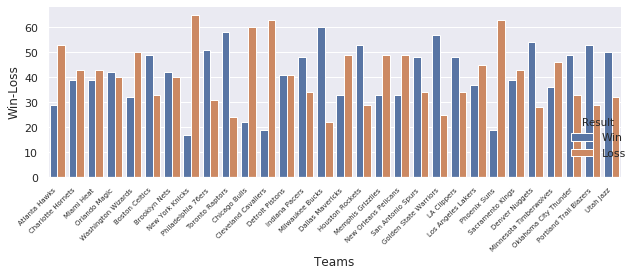

In [11]:
sns.set(style="darkgrid")
ax = sns.catplot(x="Teams", y="Win-Loss", hue="Result", data=df, kind="bar", height=4, aspect=2)

plt.xticks(
rotation=45,
horizontalalignment="right",
fontweight="light",
fontsize="xx-small"
)

plt.tight_layout()
plt.show()

# df